In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import joypy
import seaborn as sns
import datetime

%matplotlib inline

no display found. Using non-interactive Agg backend


In [2]:
df08 = pd.read_csv('/home/bbobjackson/projects/aqi/data/beijing_2008'
                  ,skiprows=2,encoding='utf-8')
df08.head()

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Duration,QC Name
0,Beijing,PM2.5,2008-04-08 15:00,2008,4,8,15,207,1 Hr,Valid
1,Beijing,PM2.5,2008-04-08 16:00,2008,4,8,16,180,1 Hr,Valid
2,Beijing,PM2.5,2008-04-08 17:00,2008,4,8,17,152,1 Hr,Valid
3,Beijing,PM2.5,2008-04-08 18:00,2008,4,8,18,162,1 Hr,Valid
4,Beijing,PM2.5,2008-04-08 19:00,2008,4,8,19,171,1 Hr,Valid


In [3]:
df08 = pd.read_csv('/home/bbobjackson/projects/aqi/data/beijing_2008'
                 ,skiprows=2)
df09 = pd.read_csv('/home/bbobjackson/projects/aqi/data/beijing_2009' 
                   , skiprows=2)
df10 = pd.read_csv('/home/bbobjackson/projects/aqi/data/beijing_2010' 
                   , skiprows=2)
df11 = pd.read_csv('/home/bbobjackson/projects/aqi/data/beijing_2011' 
                   , skiprows=2)
df12 = pd.read_csv('/home/bbobjackson/projects/aqi/data/beijing_2012' 
                   , skiprows=2)
df13 = pd.read_csv('/home/bbobjackson/projects/aqi/data/beijing_2013' 
                   , skiprows=2)
df14 = pd.read_csv('/home/bbobjackson/projects/aqi/data/beijing_2014' 
                   , skiprows=2)
df15 = pd.read_csv('/home/bbobjackson/projects/aqi/data/beijing_2015' 
                   , skiprows=3) #different
df16 = pd.read_csv('/home/bbobjackson/projects/aqi/data/beijing_2016' 
                   , skiprows=3) #different
df17 = pd.read_csv('/home/bbobjackson/projects/aqi/data/beijing_2017' 
                   , skiprows=3) #different

print(df16.shape)
df16.head()

(8784, 10)


,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Duration,QC Name
0,Beijing,PM2.5,1/1/2016 0:00,2016,1,1,0,231,1 Hr,Valid
1,Beijing,PM2.5,1/1/2016 1:00,2016,1,1,1,239,1 Hr,Valid
2,Beijing,PM2.5,1/1/2016 2:00,2016,1,1,2,205,1 Hr,Valid
3,Beijing,PM2.5,1/1/2016 3:00,2016,1,1,3,167,1 Hr,Valid
4,Beijing,PM2.5,1/1/2016 4:00,2016,1,1,4,132,1 Hr,Valid


In [4]:
#df_comb = df08.append(df09)
df_comb = pd.concat([df08, df09, df10, df11, df12, df13, df14, df15, df16, df17])
print(df_comb.shape)
df_comb.tail()
df_comb = df_comb.reset_index(drop=True)
df_comb.tail()

(79559, 10)


,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Duration,QC Name
79554,Beijing,PM2.5,6/30/2017 19:00,2017,6,30,19,51,1 Hr,Valid
79555,Beijing,PM2.5,6/30/2017 20:00,2017,6,30,20,68,1 Hr,Valid
79556,Beijing,PM2.5,6/30/2017 21:00,2017,6,30,21,61,1 Hr,Valid
79557,Beijing,PM2.5,6/30/2017 22:00,2017,6,30,22,49,1 Hr,Valid
79558,Beijing,PM2.5,6/30/2017 23:00,2017,6,30,23,55,1 Hr,Valid


#### Compare line countes of original data files using `$ wc -l <filename>` with shape of dataframe

Each smaller dataframe should have 4 fewer lines, accountings for data descriptions, spacings and headers

In [5]:
#5087 + 8760*6 + 8784*2 + 4344 #check looks good!
5091 + 8764*6 + 8788*2 + 4348 - 4*10 

79559

In [6]:
df_comb = df_comb.rename(columns={'Site':'site'
                        ,'Parameter':'parameter'
                        ,'Date (LST)':'dt'
                        ,'Year':'year'
                        ,'Month':'month'
                        ,'Day':'day'
                        ,'Hour':'hour'
                        ,'Value':'value'
                        ,'Duration':'duration'
                        ,'QC Name':'qc_name'})
df_comb['unit'] = 'micrograms per sq meter'
df_comb.head()

,site,parameter,dt,year,month,day,hour,value,duration,qc_name,unit
0,Beijing,PM2.5,2008-04-08 15:00,2008,4,8,15,207,1 Hr,Valid,micrograms per sq meter
1,Beijing,PM2.5,2008-04-08 16:00,2008,4,8,16,180,1 Hr,Valid,micrograms per sq meter
2,Beijing,PM2.5,2008-04-08 17:00,2008,4,8,17,152,1 Hr,Valid,micrograms per sq meter
3,Beijing,PM2.5,2008-04-08 18:00,2008,4,8,18,162,1 Hr,Valid,micrograms per sq meter
4,Beijing,PM2.5,2008-04-08 19:00,2008,4,8,19,171,1 Hr,Valid,micrograms per sq meter


In [7]:
print(df_comb.groupby('qc_name').size())
print('\nPercent values missing: ', round(266.0/4821, 3))

qc_name
Missing     4459
Valid      75100
dtype: int64

Percent values missing:  0.055


In [8]:
df_comb.groupby(['qc_name','year']).size()

qc_name  year
Missing  2008     266
         2009    1981
         2010     669
         2011     727
         2012     489
         2013      82
         2014      99
         2015      89
         2016      29
         2017      28
Valid    2008    4821
         2009    6779
         2010    8091
         2011    8033
         2012    8295
         2013    8678
         2014    8661
         2015    8671
         2016    8755
         2017    4316
dtype: int64

##### Yearly average coming down over time, from a relative peak in 2013

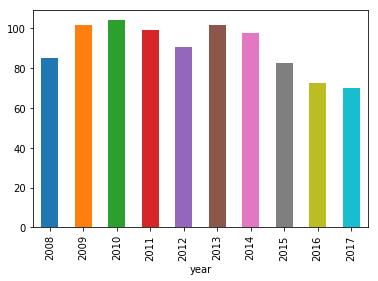

In [9]:
df_comb[df_comb.qc_name == 'Valid'].groupby('year')['value'].mean().plot(kind='bar')
#df_comb[df_comb.qc_name == 'Valid'].groupby('year')['value'].median()

##### Winter months tend to be worse, with December highest

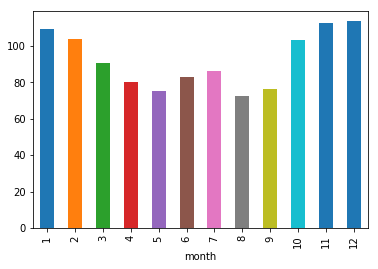

In [10]:
df_comb[df_comb.qc_name == 'Valid'].groupby('month')['value'].mean().plot(kind='bar')

##### Pollution tends to be worse at night, as average levels start to rise starting between 4pm and 5pm and staying elevated until 5am or so

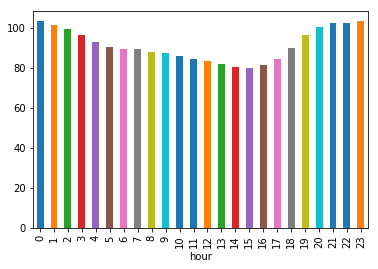

In [11]:
df_comb[df_comb.qc_name == 'Valid'].groupby('hour')['value'].mean().plot(kind='bar')

In [12]:
df_comb.groupby(['qc_name','value']).size()
# how to treat valid values that are negative? just code as missing? so filter on 'value' < 0

qc_name  value
Missing  -999     4459
Valid    -15         5
         -4          2
         -3          1
         -2          8
         -1         11
          0         15
          1         29
          2         75
          3        140
          4        216
          5        366
          6        684
          7        739
          8        861
          9        999
          10      1004
          11      1088
          12      1053
          13      1026
          14       882
          15       850
          16      1084
          17      1051
          18       862
          19       764
          20       751
          21       707
          22       670
          23       653
                  ... 
          646        1
          648        1
          649        1
          651        2
          654        1
          659        1
          666        1
          671        1
          673        1
          684        2
          700        1
          712      

In [13]:
def fill_missing(x):
    if x < 0:
        return None
    else:
        return x
    
a = fill_missing(-1)
print(a)

None


In [14]:
df_comb[df_comb.qc_name == 'Missing'].value.apply(fill_missing)
df_comb['val'] = df_comb.value.apply(fill_missing)
df_comb[df_comb.qc_name == 'Missing']
df_comb.iloc[694:700] #looks good

,site,parameter,dt,year,month,day,hour,value,duration,qc_name,unit,val
694,Beijing,PM2.5,2008-05-07 13:00,2008,5,7,13,-999,1 Hr,Missing,micrograms per sq meter,NaN
695,Beijing,PM2.5,2008-05-07 14:00,2008,5,7,14,-999,1 Hr,Missing,micrograms per sq meter,NaN
696,Beijing,PM2.5,2008-05-07 15:00,2008,5,7,15,80,1 Hr,Valid,micrograms per sq meter,80.0
697,Beijing,PM2.5,2008-05-07 16:00,2008,5,7,16,69,1 Hr,Valid,micrograms per sq meter,69.0
698,Beijing,PM2.5,2008-05-07 17:00,2008,5,7,17,66,1 Hr,Valid,micrograms per sq meter,66.0
699,Beijing,PM2.5,2008-05-07 18:00,2008,5,7,18,65,1 Hr,Valid,micrograms per sq meter,65.0


In [15]:
dates = [pd.to_datetime(d) for d in df_comb.dt]
dates[:5]

[Timestamp('2008-04-08 15:00:00'),
 Timestamp('2008-04-08 16:00:00'),
 Timestamp('2008-04-08 17:00:00'),
 Timestamp('2008-04-08 18:00:00'),
 Timestamp('2008-04-08 19:00:00')]

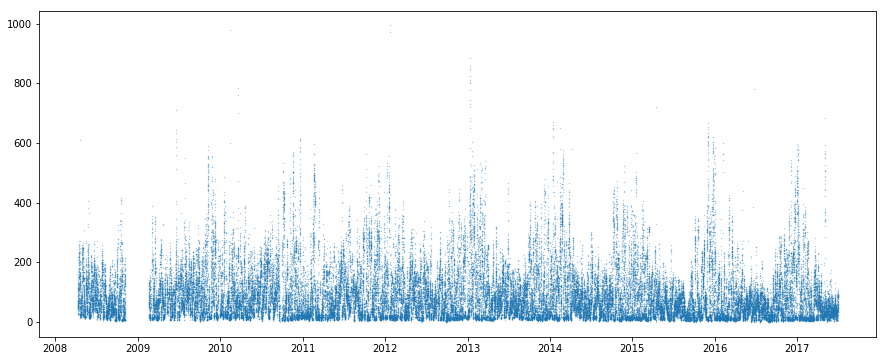

In [16]:
y = df_comb.val

plt.figure(figsize=(15,6))
plt.scatter(dates, y, alpha=0.5, s=.1)
plt.show()

##### Trying to recreate this graph produced by [Quartz](https://qz.com/197786/six-years-of-bejing-air-pollution-summed-up-in-one-scary-chart/)

In [17]:
df_comb['dt'] = pd.to_datetime(df_comb.dt)
df_comb.head()

,site,parameter,dt,year,month,day,hour,value,duration,qc_name,unit,val
0,Beijing,PM2.5,2008-04-08 15:00:00,2008,4,8,15,207,1 Hr,Valid,micrograms per sq meter,207.0
1,Beijing,PM2.5,2008-04-08 16:00:00,2008,4,8,16,180,1 Hr,Valid,micrograms per sq meter,180.0
2,Beijing,PM2.5,2008-04-08 17:00:00,2008,4,8,17,152,1 Hr,Valid,micrograms per sq meter,152.0
3,Beijing,PM2.5,2008-04-08 18:00:00,2008,4,8,18,162,1 Hr,Valid,micrograms per sq meter,162.0
4,Beijing,PM2.5,2008-04-08 19:00:00,2008,4,8,19,171,1 Hr,Valid,micrograms per sq meter,171.0


In [18]:
m = pd.DataFrame({'max_pm25':df_comb.groupby(df_comb.dt.apply(lambda x: x.date()))['val'].max()}).reset_index()
print(m.shape)
m.tail()

(3316, 2)


,dt,max_pm25
3311,2017-06-26,43.0
3312,2017-06-27,101.0
3313,2017-06-28,104.0
3314,2017-06-29,110.0
3315,2017-06-30,90.0


Concentration (ug/m^3) to AQI conversion taken from [AQICN](http://aqicn.org/calculator)

In [19]:
#0		12		35.5		55.5		150.5		250.5		350.5		500.5
a = m[m.max_pm25 <= 12]
b = m[(m.max_pm25 > 12) & (m.max_pm25 <= 35.5)]
c = m[(m.max_pm25 > 35.5) & (m.max_pm25 <= 55.5)]
d = m[(m.max_pm25 > 55.5) & (m.max_pm25 <= 150.5)]
e = m[(m.max_pm25 > 150.5) & (m.max_pm25 <= 250.5)]
f = m[(m.max_pm25 > 250.5) & (m.max_pm25 <= 350.5)]
g = m[(m.max_pm25 > 350.5) & (m.max_pm25 <= 500.5)]

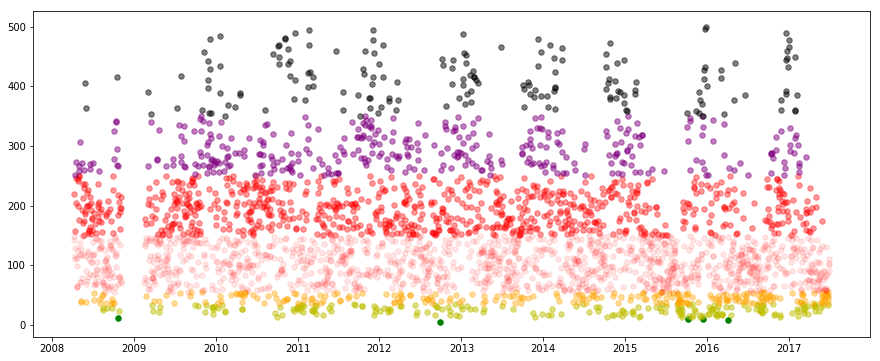

In [20]:
days = [pd.to_datetime(date) for date in m.dt]
days[:5]

plt.figure(figsize=(15,6))
plt.scatter(list(a.dt), a.max_pm25, alpha=1.0, s=30, c='g')
plt.scatter(list(b.dt), b.max_pm25, alpha=0.5, s=30, c='y')
plt.scatter(list(c.dt), c.max_pm25, alpha=0.4, s=30, c='orange')
plt.scatter(list(d.dt), d.max_pm25, alpha=0.1, s=30, c='r')
plt.scatter(list(e.dt), e.max_pm25, alpha=0.4, s=30, c='r')
plt.scatter(list(f.dt), f.max_pm25, alpha=0.5, s=30, c='purple')
plt.scatter(list(g.dt), g.max_pm25, alpha=0.5, s=30, c='black')
plt.show()

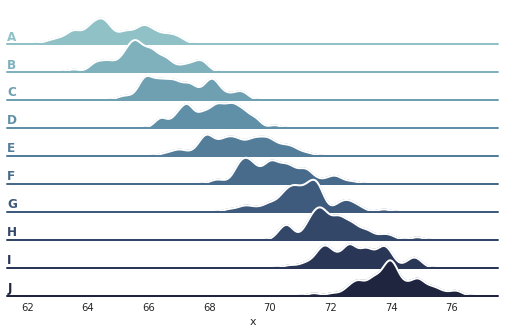

In [21]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500) #
g = np.tile(list("ABCDEFGHIJ"), 50) #
df = pd.DataFrame(dict(x=x, g=g)) #
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, size=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color, 
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play will with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [22]:
d = df_comb[['year','val']]
d.tail()

,year,val
79554,2017,51.0
79555,2017,68.0
79556,2017,61.0
79557,2017,49.0
79558,2017,55.0


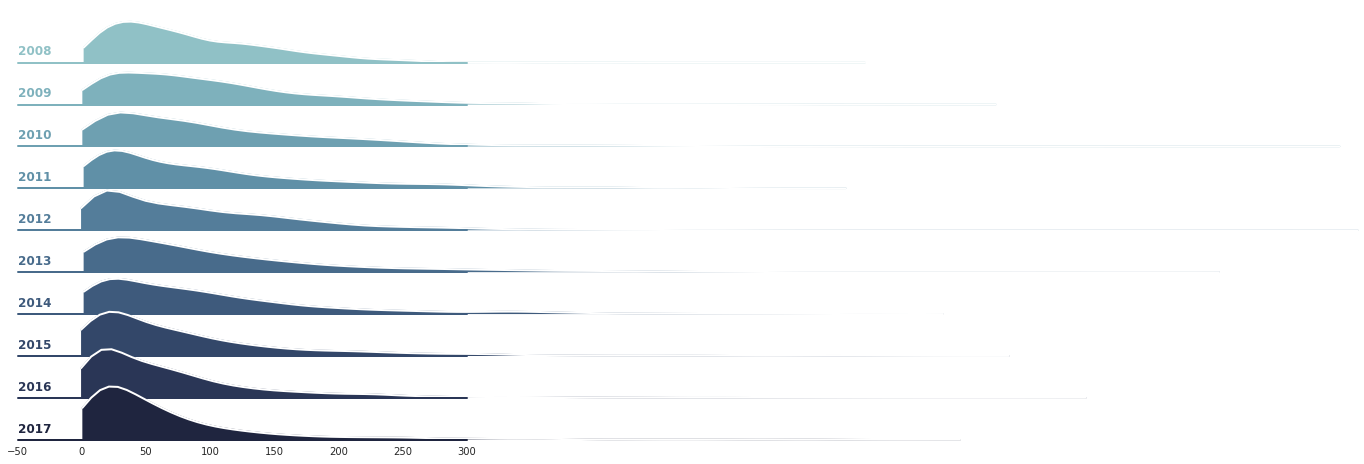

In [28]:
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(d, row="year", hue="year", aspect=10, size=.7, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "val", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "val", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color, 
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "val")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play will with overlap
g.set_titles("")
g.set(yticks=[])
#g.set(xticks=[])
g.set_xlabels('')
g.set(xlim=[-50,300])
g.despine(bottom=True, left=True)

## To Do
- Code up dates of Party Congresses, Olympics, and other events
- Convert concentrations to AQI
- Download data and perform exploratory analysis for Chengdu, Guangzhou, Shanghai and Shenyang 
- https://en.wikipedia.org/wiki/Air_quality_index#History_of_the_AQI